<div class="jumbotron">
  <h1 class="display-3">Fourth (basic) lesson with Abinit and AbiPy</h1>
  <p class="lead">The H<sub>2</sub> molecule</p> 
  <hr class="my-4">
  <p>This lesson aims at showing how to get the following physical properties, for a metal, and for a surface:

the total energy
the lattice parameter
the relaxation of surface atoms
the surface energy You will learn about the smearing of the Brillouin zone integration, and also a bit about preconditioning the SCF cycle.
This lesson should take about 1 hour and 30 minutes.
</p>
  <p class="lead">
    <a class="btn btn-primary btn-lg" href="#" role="button">Learn more</a>
  </p>
</div>

In [1]:
# Use this at the beginning of your script so that your code will be compatible with python3
from __future__ import print_function, division, unicode_literals

import numpy as np

from abipy import abilab
abilab.enable_notebook() # This line tells AbiPy we are running inside a notebook

# This line tells the notebook to show plots inside of the notebook
%matplotlib notebook

## The convergence study with respect to both number of k points and broadening

Note that there is usually a STRONG cross-convergence effect between the number of k points and the value of the broadening, tsmear.
The right procedure is: for each value of tsmear, to get the convergence with respect to the number of k points, then to compare the k-point converged values for different values of tsmear.

In what follows, we will restrict ourselves to the grids with nkpt=2, 10 and 28.

As usual, we start by writing an helper function to generate the input for the structural relaxation of Al.
The function accepts `tsmear` and another parameter, `nksmall`, that will be used to define the BZ sampling:

In [2]:
from lesson_base4 import relax_input
abilab.print_source(relax_input)

Now we use `relax_input` to generate multiple inputs with different values of `tsmear` and `nksmall`
and we pass the input objects to the Flow constructor.
To keep things as simple as possible, we use independent tasks ...

In [3]:
from lesson_base4 import build_relax_tsmear_nkpts_convflow
abilab.print_source(build_relax_tsmear_nkpts_convflow)

In [5]:
flow = build_relax_tsmear_nkpts_convflow(options=None)

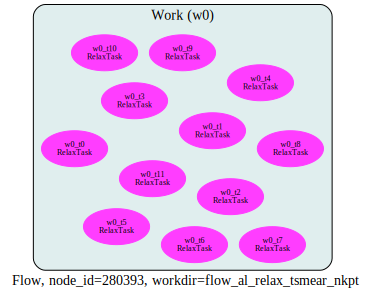

In [6]:
flow.get_graphviz()

In [24]:
#abo = abilab.abiopen("flow_al_relax/w0/t0/run.abo")
#print(abo)

In [5]:
#abo.plot();

In [6]:
#hist = abilab.abiopen("flow_al_relax/w0/t0/outdata/out_HIST.nc")
#print(hist)

In [7]:
#hist.plot();

In [8]:
robot = abilab.GsrRobot.from_dir("flow_al_relax_tsmear_nkpt")
robot

/Users/gmatteo/git_repos/abipy/abipy/core/kpoints.py:1449: UserWarning: 
monkhorst_pack_folding variables has not been written to netcdf file.
Received [-2147483647 -2147483647 -2147483647]
Setting mpdivs to None, this could create problems in post-processing tools.
If needed, use python netcdf to change the value of `monkhorst_pack_folding`
  If needed, use python netcdf to change the value of `monkhorst_pack_folding`""".format(mpdivs=self["mpdivs"]))


Label                      Relpath
-------------------------  ---------------------------------------------------
w0/t0/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t0/outdata/out_GSR.nc
w0/t1/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t1/outdata/out_GSR.nc
w0/t10/outdata/out_GSR.nc  flow_al_relax_tsmear_nkpt/w0/t10/outdata/out_GSR.nc
w0/t11/outdata/out_GSR.nc  flow_al_relax_tsmear_nkpt/w0/t11/outdata/out_GSR.nc
w0/t2/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t2/outdata/out_GSR.nc
w0/t3/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t3/outdata/out_GSR.nc
w0/t4/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t4/outdata/out_GSR.nc
w0/t5/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t5/outdata/out_GSR.nc
w0/t6/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t6/outdata/out_GSR.nc
w0/t7/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t7/outdata/out_GSR.nc
w0/t8/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t8/outdata/out_GSR.nc
w0/t9/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t9/outdata/out_GSR.nc

In [9]:
data = robot.get_dataframe()
print(data.keys())

Index(['formula', 'natom', 'angle0', 'angle1', 'angle2', 'a', 'b', 'c',
       'volume', 'abispg_num', 'spglib_symb', 'spglib_num', 'energy',
       'pressure', 'max_force', 'ecut', 'pawecutdg', 'tsmear', 'nkpt',
       'nsppol', 'nspinor', 'nspden'],
      dtype='object')


First of all, let's sort our rows first by `nkpt` and then by `tsmear` inside each `nkpt` group so that 
we have print the table in a nice format:

In [10]:
data = data.sort_values(by=["nkpt", "tsmear"])
data

,formula,natom,angle0,angle1,angle2,a,b,c,volume,abispg_num,...,energy,pressure,max_force,ecut,pawecutdg,tsmear,nkpt,nsppol,nspinor,nspden
w0/t0/outdata/out_GSR.nc,Al1,1,60.0,60.0,60.0,2.828375,2.828375,2.828375,15.999122,225,...,-56.915411,-0.000528,0.0,6.0,-1.0,0.01,2,1,1,1
w0/t3/outdata/out_GSR.nc,Al1,1,60.0,60.0,60.0,2.828375,2.828375,2.828375,15.999122,225,...,-56.958789,-0.000528,0.0,6.0,-1.0,0.02,2,1,1,1
w0/t6/outdata/out_GSR.nc,Al1,1,60.0,60.0,60.0,2.828375,2.828375,2.828375,15.999122,225,...,-57.002167,-0.000528,0.0,6.0,-1.0,0.03,2,1,1,1
w0/t9/outdata/out_GSR.nc,Al1,1,60.0,60.0,60.0,2.828376,2.828376,2.828376,15.999130,225,...,-57.045545,-0.000528,0.0,6.0,-1.0,0.04,2,1,1,1
w0/t1/outdata/out_GSR.nc,Al1,1,60.0,60.0,60.0,2.808448,2.808448,2.808448,15.663335,225,...,-57.061497,-0.000984,0.0,6.0,-1.0,0.01,10,1,1,1
w0/t4/outdata/out_GSR.nc,Al1,1,60.0,60.0,60.0,2.808507,2.808507,2.808507,15.664326,225,...,-57.077312,-0.001022,0.0,6.0,-1.0,0.02,10,1,1,1
w0/t7/outdata/out_GSR.nc,Al1,1,60.0,60.0,60.0,2.807066,2.807066,2.807066,15.640217,225,...,-57.084682,-0.002278,0.0,6.0,-1.0,0.03,10,1,1,1
w0/t10/outdata/out_GSR.nc,Al1,1,60.0,60.0,60.0,2.807934,2.807934,2.807934,15.654741,225,...,-57.089434,-0.001593,0.0,6.0,-1.0,0.04,10,1,1,1
w0/t2/outdata/out_GSR.nc,Al1,1,60.0,60.0,60.0,2.804996,2.804996,2.804996,15.605642,225,...,-57.099069,-0.012200,0.0,6.0,-1.0,0.01,28,1,1,1
w0/t5/outdata/out_GSR.nc,Al1,1,60.0,60.0,60.0,2.804765,2.804765,2.804765,15.601784,225,...,-57.098237,-0.012455,0.0,6.0,-1.0,0.02,28,1,1,1


<IPython.core.display.Javascript object>


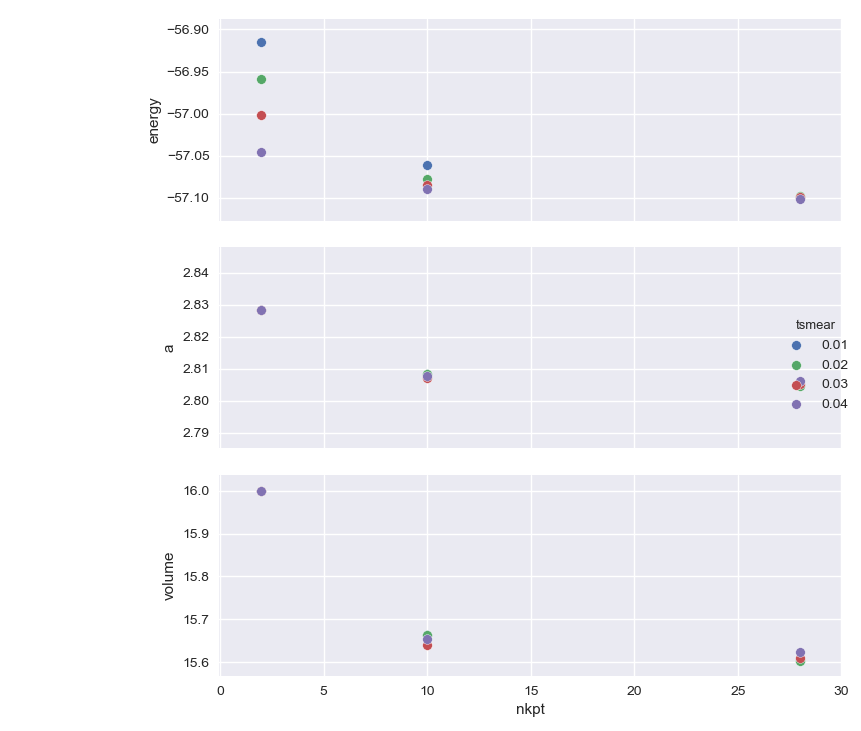

In [13]:
import seaborn as sns
sns.pairplot(data, x_vars="nkpt", y_vars=["energy", "a", "volume"], hue="tsmear"); #, plot_kws={"style": "-o"})

<IPython.core.display.Javascript object>


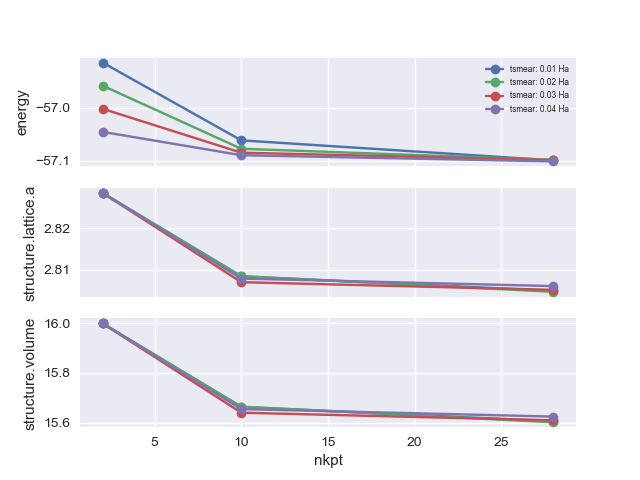

In [12]:
y_vars = ["energy", "structure.lattice.a", "structure.volume"]

robot.plot_convergence_items(y_vars, sortby="nkpt", hue="tsmear");

In [ ]:
with abilab.abiopen("flow_al_relax_tsmear_nkpt/w0/t11/outdata/out_GSR.nc") as gsr:
    ebands_w0t11 = gsr.ebands

In [ ]:
ebands_w0t11.plot();

In [ ]:
ebands_w0t11.boxplot();

Now you might ask yourself: "The total energy with nkpt == 2 is clearly not converged wrt tsmear. What are the effects of the smearing on the KS eigenvalues for nkpt == 2?"
The `GsrRobot` can construct an `ElectronBandsPlotter` that allows us to compare multiple band structures 
so it's just a matter of telling the robot that we want a plotter object in which only the
`GSR` files with only two k-points in the IBZ, then we can use the plotter to visualize the results: 

<IPython.core.display.Javascript object>


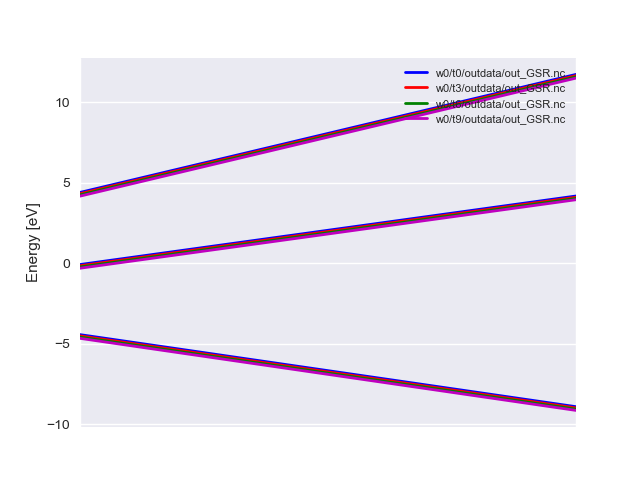

In [14]:
plotter = robot.get_ebands_plotter(filter_abifile=lambda gsr: len(gsr.kpoints) == 2)
plotter.combiplot();

The plotter provides different plot methods to visualize the same data.
Perhaps you prefer this:

<IPython.core.display.Javascript object>


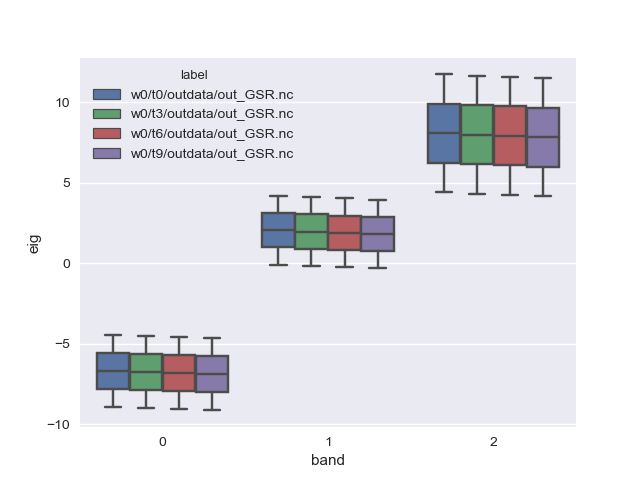

In [15]:
plotter.combiboxplot();

<IPython.core.display.Javascript object>


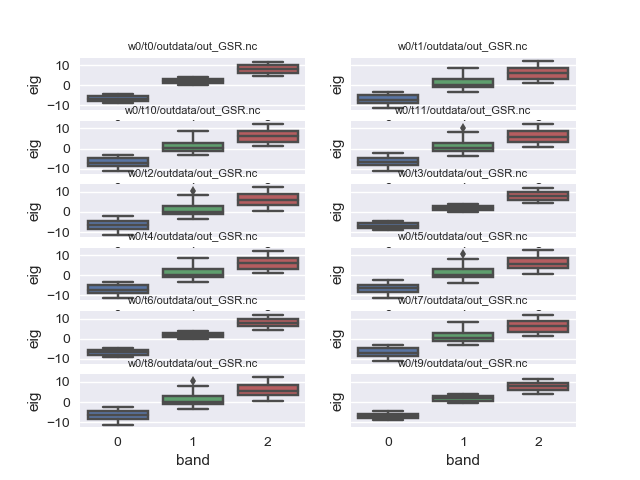

In [19]:
robot.boxplot_ebands();

<IPython.core.display.Javascript object>


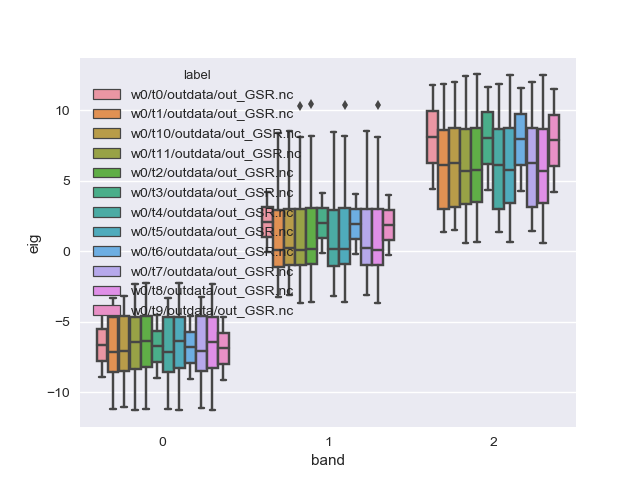

In [18]:
robot.combiboxplot_ebands();

In [9]:
edos_plotter = robot.get_edos_plotter(width=0.1, step=0.2)

<IPython.core.display.Javascript object>


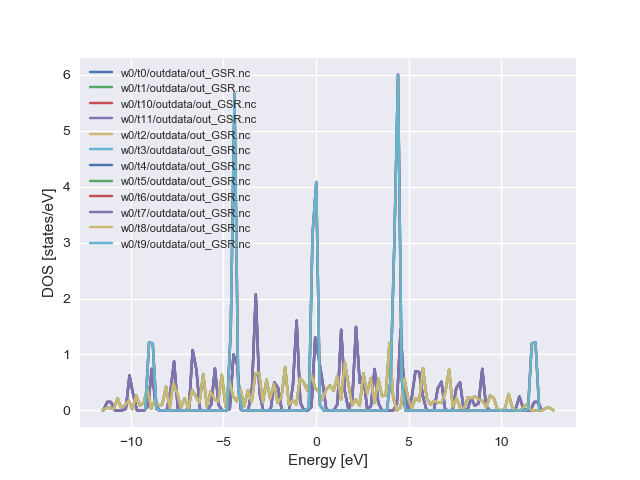

In [11]:
edos_plotter.combiplot();

<IPython.core.display.Javascript object>


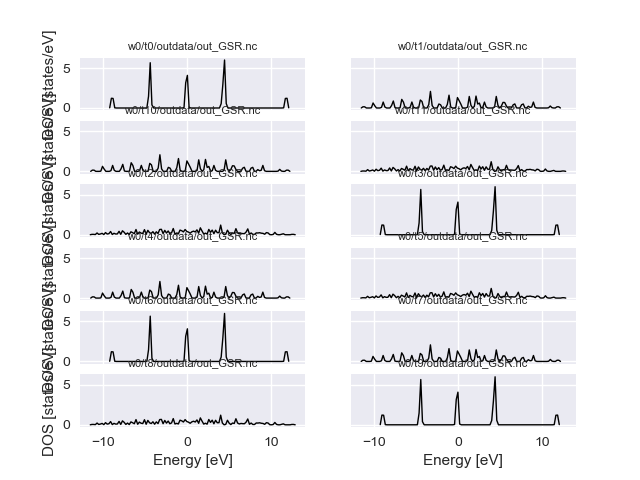

In [10]:
edos_plotter.gridplot();

In [ ]:
#e3d = ebands.get_ebands3d()

A logical next lesson would be the the tutorial on 
[phonon calculations with DFPT](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/dfpt/lesson_dfpt.ipynb)